## Ejemplo 4: Nltk FreqDist

### 1. Objetivos:
    - Aprender a usar el objeto FreqDist de la librería Nltk
 
---
    
### 2. Desarrollo:

Ahora vamos a explorar el objeto `FreqDist` que nos facilita el conteo de frecuencias de las palabras en nuestro conjunto de datos. La primera parte del procesamiento es idéntico a la vez pasada.

In [1]:
import pandas as pd
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_json('../../Datasets/new_york_times_bestsellers-clean.json')

df.head()

,amazon_product_url,author,description,publisher,title,oid,bestsellers_date.numberLong,published_date.numberLong,rank.numberInt,rank_last_week.numberInt,weeks_on_list.numberInt,price.numberDouble
0,http://www.amazon.com/The-Host-Novel-Stephenie...,Stephenie Meyer,Aliens have taken control of the minds and bod...,"Little, Brown",THE HOST,5b4aa4ead3089013507db18c,1211587200000,1212883200000,2,1,3,25.99
1,http://www.amazon.com/Love-Youre-With-Emily-Gi...,Emily Giffin,A woman's happy marriage is shaken when she en...,St. Martin's,LOVE THE ONE YOU'RE WITH,5b4aa4ead3089013507db18d,1211587200000,1212883200000,3,2,2,24.95
2,http://www.amazon.com/The-Front-Garano-Patrici...,Patricia Cornwell,A Massachusetts state investigator and his tea...,Putnam,THE FRONT,5b4aa4ead3089013507db18e,1211587200000,1212883200000,4,0,1,22.95
3,http://www.amazon.com/Snuff-Chuck-Palahniuk/dp...,Chuck Palahniuk,An aging porn queens aims to cap her career by...,Doubleday,SNUFF,5b4aa4ead3089013507db18f,1211587200000,1212883200000,5,0,1,24.95
4,http://www.amazon.com/Sundays-at-Tiffanys-Jame...,James Patterson and Gabrielle Charbonnet,A woman finds an unexpected love,"Little, Brown",SUNDAYS AT TIFFANY’S,5b4aa4ead3089013507db190,1211587200000,1212883200000,6,3,4,24.99


In [3]:
grouped_by_title = df.groupby('title')['description'].max()

grouped_by_title

title
10TH ANNIVERSARY            Detective Lindsay Boxer and the Women’s Murder...
11TH HOUR                   Detective Lindsay Boxer and the Women’s Murder...
1225 CHRISTMAS TREE LANE    Puppies and an ex-husband loom large in the la...
1356                        In the fourth book of the Grail Quest series, ...
1Q84                        In 1980s Tokyo, a woman who punishes perpetrat...
                                                  ...                        
Z                           A novel based on the lives of Zelda and F. Sco...
ZERO DAY                       A military investigator uncovers a conspiracy.
ZERO HISTORY                Several characters from “Spook Country” return...
ZONE ONE                      Fighting zombies in post-apocalyptic Manhattan.
ZOO                         A young biologist warns world leaders about th...
Name: description, Length: 754, dtype: object

Primero hay que limpiar un poco nuestros textos:

In [4]:
grouped_by_title = grouped_by_title.str.lower()
grouped_by_title = grouped_by_title.str.strip()
grouped_by_title = grouped_by_title.str.replace('[^\w\s]', '')
grouped_by_title = grouped_by_title.str.replace('\d', '')
grouped_by_title = grouped_by_title.str.replace('\\n', '')
grouped_by_title = grouped_by_title.dropna()

grouped_by_title

title
10TH ANNIVERSARY            detective lindsay boxer and the womens murder ...
11TH HOUR                   detective lindsay boxer and the womens murder ...
1225 CHRISTMAS TREE LANE    puppies and an exhusband loom large in the las...
1356                        in the fourth book of the grail quest series t...
1Q84                        in s tokyo a woman who punishes perpetrators o...
                                                  ...                        
Z                           a novel based on the lives of zelda and f scot...
ZERO DAY                        a military investigator uncovers a conspiracy
ZERO HISTORY                several characters from spook country return t...
ZONE ONE                        fighting zombies in postapocalyptic manhattan
ZOO                         a young biologist warns world leaders about th...
Name: description, Length: 754, dtype: object

In [5]:
# Separamos cada oración en palabras

tokenized = grouped_by_title.apply(nltk.word_tokenize)

In [6]:
tokenized

title
10TH ANNIVERSARY            [detective, lindsay, boxer, and, the, womens, ...
11TH HOUR                   [detective, lindsay, boxer, and, the, womens, ...
1225 CHRISTMAS TREE LANE    [puppies, and, an, exhusband, loom, large, in,...
1356                        [in, the, fourth, book, of, the, grail, quest,...
1Q84                        [in, s, tokyo, a, woman, who, punishes, perpet...
                                                  ...                        
Z                           [a, novel, based, on, the, lives, of, zelda, a...
ZERO DAY                    [a, military, investigator, uncovers, a, consp...
ZERO HISTORY                [several, characters, from, spook, country, re...
ZONE ONE                    [fighting, zombies, in, postapocalyptic, manha...
ZOO                         [a, young, biologist, warns, world, leaders, a...
Name: description, Length: 754, dtype: object

In [7]:
all_words = tokenized.sum()

In [8]:
# Utilizamos FreqDist para analizar la distribución de frecuencia de nuestras palabras

freq_dist = nltk.FreqDist(all_words)

print(freq_dist)

<FreqDist with 3161 samples and 12569 outcomes>


In [9]:
freq_dist.most_common(50)

[('a', 917),
 ('the', 778),
 ('of', 417),
 ('in', 364),
 ('to', 283),
 ('and', 280),
 ('an', 149),
 ('her', 137),
 ('is', 127),
 ('his', 123),
 ('who', 107),
 ('for', 102),
 ('with', 93),
 ('on', 71),
 ('from', 70),
 ('by', 68),
 ('series', 61),
 ('new', 61),
 ('woman', 60),
 ('that', 60),
 ('book', 57),
 ('detective', 52),
 ('murder', 51),
 ('novel', 49),
 ('when', 46),
 ('as', 42),
 ('killer', 41),
 ('at', 40),
 ('must', 39),
 ('has', 38),
 ('investigates', 38),
 ('young', 35),
 ('man', 35),
 ('life', 32),
 ('former', 32),
 ('she', 31),
 ('about', 30),
 ('their', 29),
 ('are', 28),
 ('war', 27),
 ('after', 27),
 ('family', 26),
 ('york', 26),
 ('two', 25),
 ('death', 25),
 ('world', 24),
 ('this', 24),
 ('agent', 24),
 ('into', 23),
 ('he', 23)]

Vamos a eliminar las 'palabras vacías' o 'stop words'

Para hacer esto tienes que correr primero el siguiente comando:

`nltk.download('stopwords')`

In [10]:
from nltk.corpus import stopwords

In [11]:
english_stop_words = stopwords.words('english')

all_words_except_stop_words = [word for word in all_words if word not in english_stop_words]

freq_dist_no_stop_words = nltk.FreqDist(all_words_except_stop_words)

In [12]:
freq_dist_no_stop_words.most_common(50)

[('series', 61),
 ('new', 61),
 ('woman', 60),
 ('book', 57),
 ('detective', 52),
 ('murder', 51),
 ('novel', 49),
 ('killer', 41),
 ('must', 39),
 ('investigates', 38),
 ('young', 35),
 ('man', 35),
 ('life', 32),
 ('former', 32),
 ('war', 27),
 ('family', 26),
 ('york', 26),
 ('two', 25),
 ('death', 25),
 ('world', 24),
 ('agent', 24),
 ('cia', 22),
 ('love', 22),
 ('secret', 21),
 ('discovers', 21),
 ('lawyer', 20),
 ('murdered', 20),
 ('finds', 20),
 ('eve', 19),
 ('th', 19),
 ('mother', 19),
 ('case', 19),
 ('women', 19),
 ('wife', 19),
 ('serial', 18),
 ('first', 18),
 ('secrets', 18),
 ('pursues', 18),
 ('investigator', 18),
 ('operative', 18),
 ('missing', 17),
 ('search', 17),
 ('searches', 17),
 ('help', 17),
 ('fbi', 17),
 ('stone', 17),
 ('years', 17),
 ('girl', 17),
 ('investigate', 16),
 ('one', 16)]

In [13]:
# Conteo de una palabra y porcentaje de aparición

print(f'{(100 * freq_dist_no_stop_words["woman"] / len(all_words_except_stop_words)):.3f}%')

0.786%


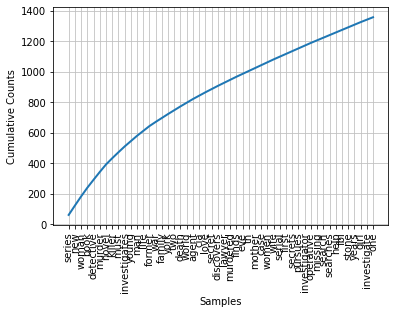

In [14]:
# Veamos qué proporción del text está siendo ocupada por las 50 palabras más comunes

freq_dist_no_stop_words.plot(50, cumulative=True);

In [16]:
# Palabras que sólo aparecen una sola vez

freq_dist_no_stop_words.hapaxes()[:20]

['puppies',
 'loom',
 'last',
 'grail',
 'poitiers',
 'tokyo',
 'punishes',
 'domestic',
 'aspiring',
 'resent',
 'draining',
 'weakening',
 'economy',
 'earthquake',
 'tests',
 'countrys',
 'jewish',
 'mishandling',
 'pregnant',
 'shows']

In [17]:
# Palabras largas

unique = set(all_words_except_stop_words)
unique_series = pd.Series(list(unique))

unique_series

0           guests
1            harry
2        counselor
3         district
4            lucas
           ...    
3060      contract
3061        québec
3062    organizers
3063    occasional
3064      kavanagh
Length: 3065, dtype: object

In [18]:
unique_series[unique_series.str.len() > 15]

387      suicidebyaccident
559       mountainclimbing
747       postthanksgiving
1479      counterterrorism
1600      publicityseeking
2019    turnofthethcentury
2117      dissatisfactions
2237      singersongwriter
2879      autobiographical
2992     multigenerational
dtype: object

In [19]:
# Palabras largas que son frecuentes

larger_than_10 = unique_series.str.len() > 7
is_frequent = unique_series.apply(lambda x: freq_dist_no_stop_words[x] > 7)

unique_series[larger_than_10 & is_frequent]

26           character
128          discovers
424          daughters
563          detective
784           reporter
856         washington
947         barrington
1002          carolina
1087          intrigue
1247        paranormal
1289    pseudonymously
1538          american
1602          forensic
1711        characters
1746          involved
1821     investigation
1938          together
2002         terrorist
2025        mysterious
2073          murdered
2119          daughter
2161          assassin
2244      investigates
2262     disappearance
2276       investigate
2302          searches
2414         operative
2490         dangerous
2663         manhattan
2876      investigator
dtype: object

In [20]:
# Podemos contar otras cosas, como la frecuencia de longitudes de nuestras palabras

freq_dist_lengths = nltk.FreqDist([len(w) for w in all_words_except_stop_words])

In [21]:
freq_dist_lengths.most_common()

[(5, 1382),
 (6, 1364),
 (7, 1212),
 (4, 1051),
 (8, 707),
 (9, 586),
 (3, 471),
 (10, 354),
 (11, 164),
 (12, 157),
 (2, 60),
 (13, 60),
 (14, 30),
 (16, 11),
 (15, 11),
 (1, 8),
 (17, 2),
 (18, 1)]

In [22]:
freq_dist_lengths.max()

5

In [23]:
freq_dist_lengths[5]

1382

In [24]:
# También podemos saber qué proporción del total de palabras tiene longitud de 5

freq_dist_lengths.freq(5)

0.18110339405058315